# Max Voting, Averaging & Weighted Average Voting

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import seaborn as sns
 

In [28]:
x , y = make_moons(n_samples=1000 , noise=0.2)

In [29]:
df ={"x1":x[:,0],"x2":x[:,1],"y":y}

In [30]:
dataset =pd.DataFrame(df)

In [32]:
dataset

,x1,x2,y
0,0.576766,1.077563,0
1,1.773274,-0.272548,1
2,0.062435,-0.529135,1
3,1.214234,-0.466827,1
4,1.259856,-0.620237,1
...,...,...,...
995,0.460865,0.926885,0
996,-0.809487,0.410367,0
997,-0.698668,0.941257,0
998,-0.245448,0.966285,0


<Axes: xlabel='x1', ylabel='x2'>

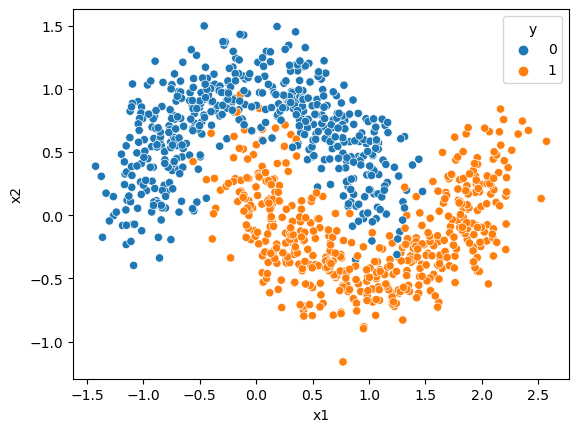

In [31]:
sns.scatterplot(x="x1",y="x2",data=dataset,hue="y")

In [33]:
x_a = dataset.iloc[:,:-1]
y_a = dataset["y"]

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
x_train , x_test, y_train , y_test = train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [39]:
dt =DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100 , dt.score(x_test , y_test)*100

(100.0, 96.0)

In [41]:
sv = SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100 , sv.score(x_test , y_test)*100

(97.125, 97.0)

In [42]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100 , gnb.score(x_test , y_test)*100

(87.375, 89.0)

In [43]:
from sklearn.ensemble import VotingClassifier

In [44]:
li = [("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb1",GaussianNB())]

In [45]:
vc  = VotingClassifier(li)
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('sv1', SVC()),
                             ('gnb1', GaussianNB())])

In [48]:
vc.score(x_train,y_train)*100 , vc.score(x_test ,y_test)*100

(97.5, 97.0)

In [54]:
prd = {"dt" : dt.predict(x_test),"svm" :dt.predict(x_test), "gnb" :gnb.predict(x_test) , "vc" : vc.predict(x_test)}

In [55]:
pd.DataFrame(prd)

,dt,svm,gnb,vc
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,1,1,0,1
...,...,...,...,...
195,0,0,0,0
196,1,1,1,1
197,0,0,0,0
198,1,1,1,1
